$\large\textbf{Outlier Detection}$

In [19]:
from pandas import read_csv
import pandas as pd
import seaborn as sns

In [20]:
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [21]:
# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
df = stocks
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [22]:
N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


In [23]:
# Extracting the values from the dataframe
data = delta.values

# Split dataset into input and output elements
X, y = data[:, 0:3], data[:, -1]

# Summarize the shape of the dataset
print(X.shape, y.shape)

(2517, 3) (2517,)


In [24]:
from sklearn.svm import OneClassSVM

ee = OneClassSVM(nu=0.01,gamma='auto').fit(X)
yhat = ee.predict(X) # Perform fit on input data and returns labels for that input data.
score = ee.score_samples(X)

print(yhat) # Print labels: -1 for outliers and 1 for inliers.
print(yhat.shape)

[1 1 1 ... 1 1 1]
(2517,)


In [25]:
#score.shape

In [26]:
labeled = delta.assign(Score=score)
labeled

,MSFT,F,BAC,Score
Date,,,,
1/4/2007,-0.167455,2.529960,0.637532,0.148043
1/5/2007,-0.570278,-1.038961,-0.801185,0.148264
1/8/2007,0.978411,1.443570,0.394438,0.148593
1/9/2007,0.100231,0.776197,0.093543,0.147947
1/10/2007,-1.001332,-0.770218,0.149536,0.148078
...,...,...,...,...
12/23/2016,-0.487800,0.483871,0.266189,0.148092
12/27/2016,0.063246,-0.561798,0.044252,0.147954
12/28/2016,-0.458276,-1.129944,-1.238394,0.148248


In [27]:
# Select all rows that are not outliers
mask = yhat != 1
X, y = X[mask, :], y[mask]

# Summarize the shape of the updated dataset
print(X.shape, y.shape)

(448, 3) (448,)


In [28]:
outliers = pd.DataFrame(data=X, columns=['MSFT', 'F', 'BAC'])
len(outliers)

448

In [29]:
data = delta.values

# Split dataset into input and output elements
X, y = data[:, 0:3], data[:, -1]

# Summarize the shape of the dataset
print(X.shape, y.shape)

mask = yhat != -1
Z, y = X[mask, :], y[mask]

# Summarize the shape of the updated dataset
print(Z.shape, y.shape)

(2517, 3) (2517,)
(2069, 3) (2069,)


In [30]:
inliers = pd.DataFrame(data=Z, columns=['MSFT', 'F', 'BAC'])
len(inliers)

2069

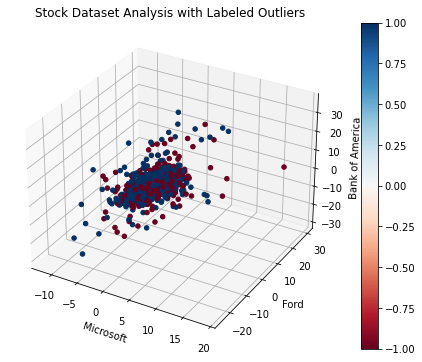

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(labeled['MSFT'],labeled['F'],labeled['BAC'],c=yhat,cmap='RdBu', alpha=1)
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
ax.set_title('Stock Dataset Analysis with Labeled Outliers')
fig.colorbar(p)
plt.show()

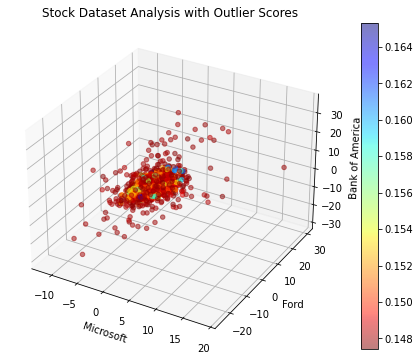

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(labeled['MSFT'],labeled['F'],labeled['BAC'],c=labeled['Score'],cmap='jet_r', alpha=0.5)
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
ax.set_title('Stock Dataset Analysis with Outlier Scores')
fig.colorbar(p)
plt.show()

In [33]:
df_s = pd.DataFrame(score)

Text(0, 0.5, 'Counts')

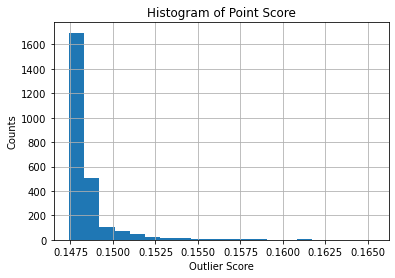

In [34]:
df_s.hist(bins=20)
plt.title("Histogram of Point Score")
plt.xlabel("Outlier Score")
plt.ylabel("Counts")

In [35]:
yhat_df = pd.DataFrame(yhat)

Text(0, 0.5, 'Counts')

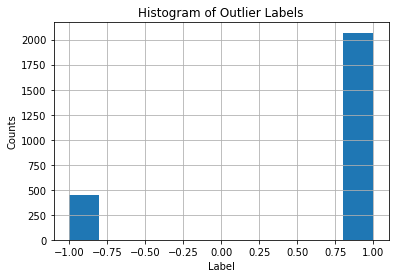

In [36]:
yhat_df.hist(bins=10)
plt.title("Histogram of Outlier Labels")
plt.xlabel("Label")
plt.ylabel("Counts")

In [37]:
print('Frequency of estimated outlier labels:', len(outliers))
print('Frequency of estimated inlier labels:', len(inliers))

Frequency of estimated outlier labels: 448
Frequency of estimated inlier labels: 2069


In [38]:
percent = len(outliers)/len(delta)
perc = int(percent*100)
print(percent*100, '%')

17.798967024235203 %


In [39]:
print('It is initially stated that 1% of the dataset should be labelled as outliers (nu=0.01). However the actual percent calculated by the SVM algorithm is approximately:'
      ,perc,'%')

It is initially stated that 1% of the dataset should be labelled as outliers (nu=0.01). However the actual percent calculated by the SVM algorithm is approximately: 17 %


In terms of the plotted results, the one-class SVM classifier has classified outliers into one of two categories. Either an outlier or not. The other classification methods use a score to denote how much of an outlier each point is.

$$\newline$$

$\large\textbf{Principle Component Analysis}$

In [40]:
# Loading the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df0 = read_csv(url, header=None)

df_z = StandardScaler().fit_transform(df0)

X1, y = df_z[:, :-1], df_z[:, -1]

In [41]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X1)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

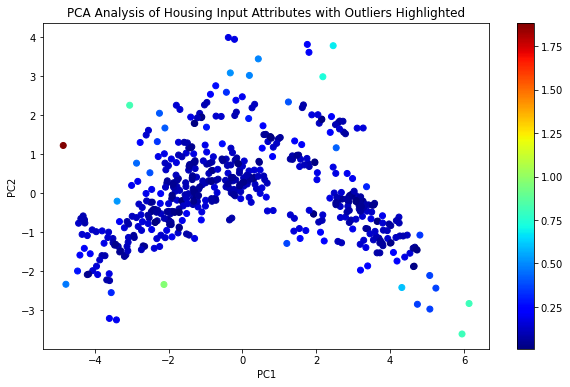

In [42]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

# Implement a k-nearest neighbour approach using k=4 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pca_df.values)
distances, indices = nbrs.kneighbors(pca_df.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pca_df.PC1,pca_df.PC2,c=outlier_score,cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Analysis of Housing Input Attributes with Outliers Highlighted')
fig.colorbar(p)
plt.show()